# rejection

## data prepare

In [11]:
# /Users/rhuang/HXMT_data/1K/Y201810/20181001-0474/HXMT_20181001T01_HE-Cnts_FFFFFF_V1_1K.FITS

In [12]:
from GCSpy.GCSpy import *

In [13]:
Veto=Table.read('/Users/rhuang/HXMT_data/1K/Y201810/20181001-0474/HXMT_20181001T01_HE-Cnts_FFFFFF_V1_1K.FITS',hdu=3)
Veto

Time,Cnt_VetoDet_0,Cnt_VetoDet_1,Cnt_VetoDet_2,Cnt_VetoDet_3,Cnt_VetoDet_4,Cnt_VetoDet_5,Cnt_VetoDet_6,Cnt_VetoDet_7,Cnt_VetoDet_8,Cnt_VetoDet_9,Cnt_VetoDet_10,Cnt_VetoDet_11,Cnt_VetoDet_12,Cnt_VetoDet_13,Cnt_VetoDet_14,Cnt_VetoDet_15,Cnt_VetoDet_16,Cnt_VetoDet_17
s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s,counts/s
int32,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16
212979603,321,321,354,391,728,770,343,345,341,278,728,674,292,310,298,275,680,740
212979604,266,289,285,321,744,686,324,313,311,296,708,673,308,301,315,301,717,680
212979605,300,258,322,335,696,696,342,345,312,308,715,666,291,297,255,257,706,724
212979606,294,290,308,343,669,738,380,305,295,292,679,640,282,301,294,293,696,693
212979607,306,319,294,359,741,733,375,310,341,310,723,686,289,310,340,311,722,728
212979608,284,279,318,334,668,704,357,323,299,315,707,606,290,293,270,267,718,644
212979609,300,304,301,339,727,675,333,361,318,317,690,713,297,296,300,307,702,659
212979610,270,300,285,329,683,701,368,331,300,297,684,694,305,309,324,276,736,654


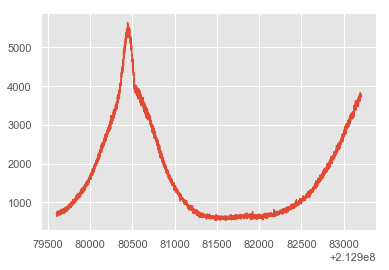

In [14]:
plt.plot(Veto['Time'],Veto['Cnt_VetoDet_17'])

## smooth data

In [15]:
def filter_smooth_iter(y,order,Wn,iteration=1,plot=False,btype='low'):
    y_o = y
    y=np.hstack((y[::-1],y,y[::-1]))
    for i in range(iteration):
        b, a = signal.butter(order,Wn ,btype=btype)
        y_smooth=signal.filtfilt(b, a, y)
        
        residual = y-y_smooth
        Limit = [np.mean(residual) - 4 * np.std(residual), np.mean(residual) + 4 * np.std(residual)]
        if plot == True:
            plt.plot(y_o)
            plt.plot(y_smooth)
            plt.plot(residual)
            plt.plot(residual[(residual < Limit[1])&(residual>Limit[0])])

        residual[(residual > Limit[1])] = 0
        residual[(residual < Limit[0])] = 0
        y = y_smooth + residual
    return y_smooth[int(y_smooth.shape[0] / 3):int(y_smooth.shape[0] *2 / 3)]




# Test

## run

In [20]:
x=Veto['Time']
y=Veto['Cnt_VetoDet_17']

/Users/rhuang/software/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


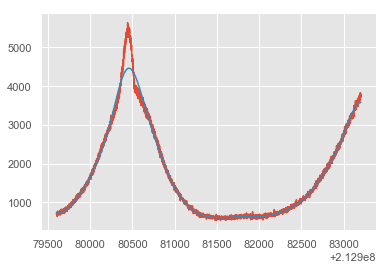

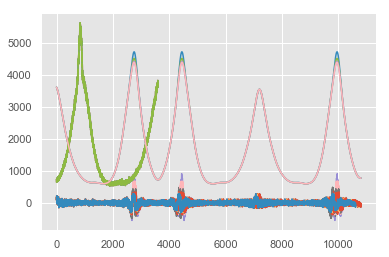

In [21]:
x=Veto['Time']
y=Veto['Cnt_VetoDet_17']
plt.plot(x,y)
flare_time=200
deltaT=1
Wn=1/flare_time*deltaT
plt.plot(x,filter_smooth_iter(y,order=4,Wn=Wn,iteration=6,plot=False,btype='low'))
plt.show()
y_smooth = filter_smooth_iter(y,order=2,Wn=Wn,iteration=4,plot=True,btype='low')

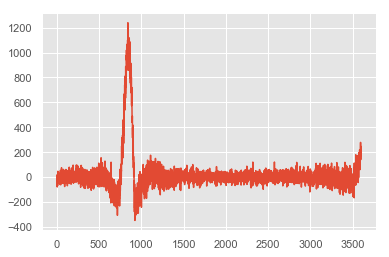

In [22]:
residual = y - y_smooth
plt.plot(residual)

## time of flare

In [23]:
Limit = [np.mean(residual) - 3 * np.std(residual), np.mean(residual) + 3 * np.std(residual)]
if np.sum(( residual < np.mean(residual) - 3 * np.std(residual)) | (residual > np.mean(residual) + 3 * np.std(residual) )):
    print('time of flare: ',x[residual==residual.max()])

time of flare:     Time  
    s    
---------
212980444
